In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
df = pd.read_csv('../data_updated.csv')

In [3]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
df['Hour'] = df['Time'].dt.hour

In [4]:
hour_counts = df['Hour'].value_counts().sort_index()

In [5]:
mean = hour_counts.mean()
min_value = hour_counts.min()
max_value = hour_counts.max()

In [6]:
colors = cm.tab20(np.linspace(0, 1, len(hour_counts)))

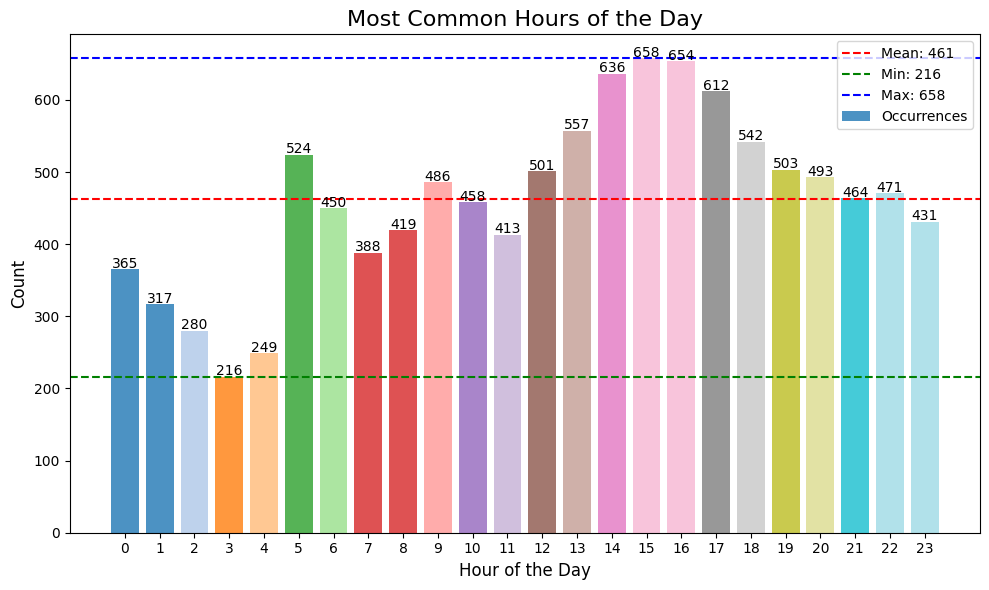

In [7]:
plt.figure(figsize=(10, 6))
bars = plt.bar(hour_counts.index, hour_counts.values, color=colors, alpha=0.8, label='Occurrences')

plt.axhline(mean, color='red', linestyle='--', label=f'Mean: {int(mean)}')
plt.axhline(min_value, color='green', linestyle='--', label=f'Min: {int(min_value)}')
plt.axhline(max_value, color='blue', linestyle='--', label=f'Max: {int(max_value)}')

for bar, count in zip(bars, hour_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, str(count), ha='center', fontsize=10)

plt.title('Most Common Hours of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(0, 24))
plt.legend()
plt.tight_layout()

plt.savefig('plots/most_common_hours.png')
plt.show()
plt.close()